In [11]:
#Import all required libraries for reading data, analysing and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# import ploty for visualization
import plotly
import plotly.offline as py # make offline 
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.tools as tls
import plotly.figure_factory as fig_fact
plotly.tools.set_config_file(world_readable=True, sharing='public')
import warnings
color = sns.color_palette()
warnings.filterwarnings('ignore')
# this will allow ploting inside the notebook
%matplotlib inline


# Read csv

In [6]:
#importing every dataset
 business_attributes=pd.read_csv("dataset\business_attributes.csv")
business_hours=pd.read_csv("dataset\yelp_business_hours.csv")
check_in=pd.read_csv("dataset\yelp_checkin.csv")
reviews=pd.read_csv("dataset\yelp_review.csv")
tip=pd.read_csv("dataset\yelp_tip.csv")
user=pd.read_csv("dataset\yelp_user.csv")

In [7]:
business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


## Star Rating Distribution

we will start our analysis from explore the rating distribution.

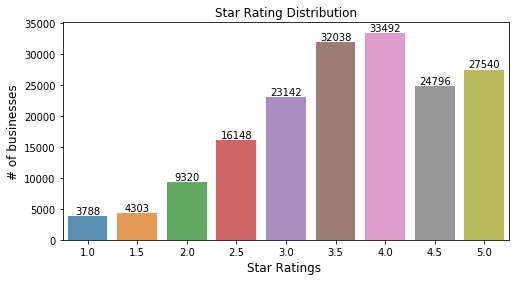

In [8]:
#Get the distribution of the ratings
x=business['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

We can see most of the businesses got 4.0 stars.

## Popular Business Categories By State EDA

There are  59106  different types/categories of Businesses in Yelp!


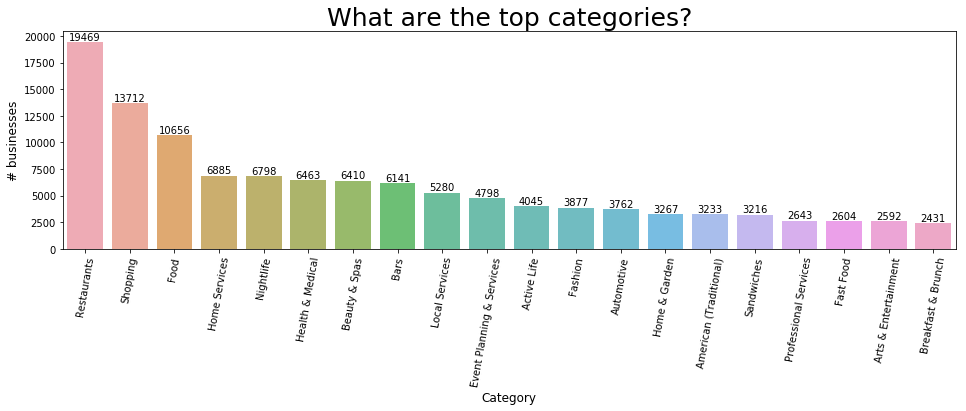

In [9]:
# What are the popular business categories?
business_cats=' '.join(business['categories'])

cats=pd.DataFrame(business_cats.split(';'),columns=['category'])
x=cats.category.value_counts()
print("There are ",len(x)," different types/categories of Businesses in Yelp!")
#prep for chart
x=x.sort_values(ascending=False)
x=x.iloc[0:20]

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)#,color=color[5])
plt.title("What are the top categories?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

So Restaruants are the most common category. There are so many categories in our data which is not good for our analysis. So we will need to downsizing it in furture machine learning.

## State with most reviews

Now let's look at the reviews distribution on states.

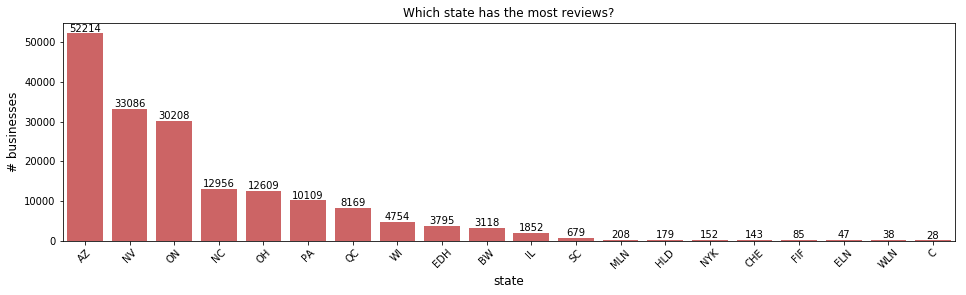

In [78]:
#Get the distribution of the ratings
x=business['state'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8,color=color[3])
plt.title("Which state has the most reviews?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('state', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [13]:
#get all ratings data
rating_data=business[['latitude','longitude','stars','review_count']]
# Creating a custom column popularity using stars*no_of_reviews
rating_data['popularity']=rating_data['stars']*rating_data['review_count']

In [69]:
#checkins exploration
df=check_in.groupby(['weekday','hour'])['checkins'].sum()
df=df.reset_index()
df=df.pivot(index='hour',columns='weekday')[['checkins']]
df.columns = df.columns.droplevel()
df=df.reset_index()
# Workaround for not being able to sort the values by hour
df.hour=df.hour.apply(lambda x: str(x).split(':')[0])
df.hour=df.hour.astype(int)
# Sort the hour column 
df=df.sort_values('hour')
df=df[['hour','Mon', 'Tue','Wed','Thu','Fri','Sat', 'Sun' ]]
# df=df.set_index('hour')
cm = sns.light_palette("orange", as_cmap=True)
#highlight the max of each column
#df.style.apply(highlight_max, color='darkorange', axis=0)

## checkin Data Details of Yelp

To explore the relationship between yelp checkins and the business rating, we will have to calculate the average dayly check in for furthur analysis

In [20]:
check_in.head(5)

,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1
3,tEzxhauTQddACyqdJ0OPEQ,Fri,19:00,1
4,CEyZU32P-vtMhgqRCaXzMA,Tue,17:00,1


## Number of Checkins for a BusinessID

In [23]:
check_in[check_in['business_id']=='3Mc-LxcqeguOXOVT_2ZtCg']

,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12
8407,3Mc-LxcqeguOXOVT_2ZtCg,Tue,1:00,10
207603,3Mc-LxcqeguOXOVT_2ZtCg,Mon,20:00,9
235840,3Mc-LxcqeguOXOVT_2ZtCg,Sun,22:00,11
248744,3Mc-LxcqeguOXOVT_2ZtCg,Wed,1:00,13
286048,3Mc-LxcqeguOXOVT_2ZtCg,Tue,20:00,7
377364,3Mc-LxcqeguOXOVT_2ZtCg,Mon,5:00,1
380588,3Mc-LxcqeguOXOVT_2ZtCg,Mon,17:00,1
385995,3Mc-LxcqeguOXOVT_2ZtCg,Thu,23:00,7
394964,3Mc-LxcqeguOXOVT_2ZtCg,Sat,3:00,6


## Business details for a company

In [24]:
business_attributes.head()

,business_id,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,...,Corkage,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
0,FYWN1wneV18bWNgQjJ2GNg,Na,Na,Na,True,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
1,He-G7vWjzVUysIKrfNbPUQ,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
2,8DShNS-LuFqpEWIp0HxijA,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
3,PfOCPjBrlQAnz__NXj9h_w,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
4,o9eMRCWt5PkpLDE0gOPtcQ,Na,Na,Na,Na,False,False,False,False,False,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na


In [25]:
business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


## Average ratings of Business ID 

In [39]:
business[business['business_id']=='3Mc-LxcqeguOXOVT_2ZtCg']['stars']

11047    4.0
Name: stars, dtype: float64

## Calculating Relationship Between CheckIns and Number of Stars

In [49]:
import math
checkin_list = []
busi = []
for bid in business['business_id'][:2000]:
    lis = check_in[check_in['business_id']==bid]['checkins'].tolist()
    ave = np.mean(lis)
    if not math.isnan(ave):
        checkin_list.append(ave)
        busi.append(bid)
    else:
        print("Nan find!")

Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!
Nan find!


KeyboardInterrupt: 

By combine our checkin tables and business tables, we select some businesses which has checkin data to do the explore in this relationship

In [62]:
stars = []
# This go through the businesses in our checkin list 
# and get the business rating
for i in busi:
    star = float(business[business['business_id'] == i]['stars'])
    stars.append(star)

## Graph Between Relation of Checkin and No of stars on Yelp 

## More The Number of Checkins has a effect on the Ratings on Yelp


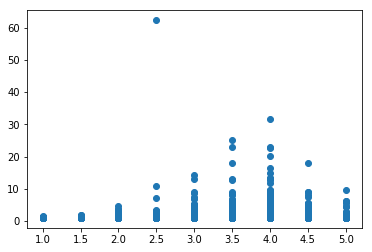

In [63]:
plt.scatter(np.array(stars), np.array(checkin_list))
plt.show()

From this we can see in general, the rating tend to be higher when there is more dayly checkins. This is because:
* For businesses with higher checkins, they probably serve more customers in a day which will have some complains then lower their checkins from 5 stars.
* With fewer checkins for 5 stars restaurants, they probaly just started and don't have a lot of recognization, so they can remain 5 stars for a few time with little customers. 

The text in the document by <Xiajie Zhang> is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/

The code in the document by <Xiajie Zhang> is licensed under the MIT License https://opensource.org/licenses/MIT